### Implement from sklearn package

#### Load data

In [2]:
import numpy as np
import pandas as pd

In [4]:
loans = pd.read_csv('lending-club-data.csv')

C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

#### Modify the target column

In [7]:
loans["safe_loans"] = loans["bad_loans"].apply(lambda x: +1 if x==0 else -1)

#### Selecting features

In [9]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

#### Skipping observations with missing values

In [12]:
loans = loans[features + [target]].dropna()

In [14]:
import json 
with open ("module-8-assignment-1-validation-idx.json", "r") as f:
    valid_idx = json.load(f)
with open ("module-8-assignment-1-train-idx.json", "r") as f:
    train_idx = json.load(f)

In [15]:
loans = pd.get_dummies(loans)

In [18]:
validation_data = loans.iloc[valid_idx]
train_data = loans.iloc[train_idx]

#### Gradient boosted tree classifier

Gradient boosted trees are a powerful variant of boosting methods; they have been used to win many Kaggle competitions, and have been widely used in industry. We will explore the predictive power of multiple decision trees as opposed to a single decision tree.

We will now train models to predict safe_loans using the features above. In this section, we will experiment with training an ensemble of 5 trees

First, let's grab 2 positive examples and 2 negative examples. In SFrame, that would be:

In [19]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
26,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
24,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
41,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0


For each row in the sample_validation_data, write code to make model_5 predict whether or not the loan is classified as a safe loan. (Hint: if you are using scikit-learn, you can use the .predict() method)

In [23]:
import sklearn
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
model_5 = GradientBoostingClassifier(max_depth = 6, n_estimators=5)

In [49]:
model_5.fit(train_data.drop("safe_loans",1), train_data["safe_loans"])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=5, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [50]:
model_5.predict(sample_validation_data.drop("safe_loans",1))

array([ 1,  1, -1,  1], dtype=int64)

In [51]:
sample_validation_data["safe_loans"]

22    1
26    1
24   -1
41   -1
Name: safe_loans, dtype: int64

#### Prediction Probabilities

In [52]:
model_5.predict_proba(sample_validation_data.drop("safe_loans",1))

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

#### Evaluating the model on the validation data

Evaluate the accuracy of the model_5 on the validation_data. (Hint: if you are using scikit-learn, you can use the .score() method)

In [53]:
model_5.score(X= valid_data.drop("safe_loans",1),y=valid_data["safe_loans"])

0.66124515295131414

Calculate the number of false positives made by the model on the validation_data.

In [57]:
false_pos = sum(model_5.predict(validation_data.drop("safe_loans",1)) > validation_data["safe_loans"])
false_pos

1654

Calculate the number of false negatives made by the model on the validation_data.

In [58]:
false_neg = sum(model_5.predict(validation_data.drop("safe_loans",1)) < validation_data["safe_loans"])
false_neg

1491

#### Comparison with decision trees

Calculate the cost of mistakes made by model_5 on the validation_data.
<br \> Assume a cost of 10,000 per false negative.
<br \> Assume a cost of 20,000 per false positive.

Calculate the cost of mistakes made by model_5 on the validation_data.

In [60]:
cost = false_neg * 10000 + false_pos* 20000
cost

47990000

In [63]:
cost_old = 10000 * 1936  + 20000 * 1503
cost_old

49420000

Compare the cost of the mistakes made by the boosted trees model with the decision tree model. The extra 3% improvement in prediction accuracy can translate to several million dollars! And, it was so easy to get by simply boosting our decision trees.

#### Most positive & negative loans

In [66]:
validation_data["predictions"] = model_5.predict_proba(validation_data.drop("safe_loans",1))[:,1]

C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
validation_data[['grade_A','grade_B','grade_C','grade_D','predictions']].sort_values('predictions', ascending = False).head(5)

,grade_A,grade_B,grade_C,grade_D,predictions
8021,1,0,0,0,0.673059
15170,1,0,0,0,0.661468
15072,1,0,0,0,0.661468
90263,1,0,0,0,0.661468
7650,1,0,0,0,0.661468


In [72]:
validation_data[['grade_A','grade_B','grade_C','grade_D','predictions']].sort_values('predictions', ascending = False).tail(5)

,grade_A,grade_B,grade_C,grade_D,predictions
84921,0,0,1,0,0.315973
101746,0,0,0,1,0.315973
27502,0,0,1,0,0.312806
58794,0,0,1,0,0.307334
84508,0,0,1,0,0.307334


#### Effects of adding more trees

In [73]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6)
model_10.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [74]:
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6)
model_50.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [75]:
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6)
model_100.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [76]:
model_200 = GradientBoostingClassifier(n_estimators=200, max_depth=6)
model_200.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [77]:
model_500 = GradientBoostingClassifier(n_estimators=500, max_depth=6)
model_500.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [78]:
model_10.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

0.66544592847910389

In [79]:
model_50.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])


0.68354157690650585

In [80]:
model_100.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])


0.69054286945282206

In [81]:
model_200.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])


0.68601895734597151

In [82]:
model_500.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])


0.68709607927617411

#### Plot the training and validation error vs. number of trees

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [84]:
train_err_10 = 1 - model_10.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [85]:
train_err_50 = 1 - model_50.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [86]:
train_err_100 = 1 - model_100.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [87]:
train_err_200 = 1 - model_200.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [88]:
train_err_500 = 1 - model_500.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [89]:
validation_err_10 = 1 - model_10.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_50 = 1 - model_50.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_100 = 1 - model_100.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_200 = 1 - model_200.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_500 = 1 - model_500.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

In [90]:
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [91]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

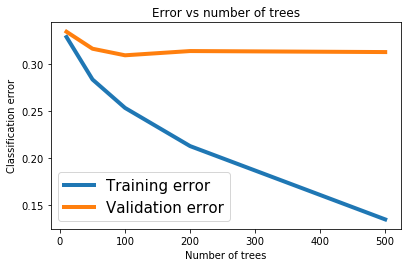

In [92]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

### Boosting from scratch

In [123]:
loans = pd.read_csv('lending-club-data.csv')
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans.drop('bad_loans',1)
target = 'safe_loans'

features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
loans = loans[features + [target]]
loans= pd.get_dummies(loans)

C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
import json
with open ("module-8-assignment-2-train-idx.json", "r") as f:
    train_idx = json.load(f)
    
with open ("module-8-assignment-2-test-idx.json", "r") as f:
    test_idx = json.load(f)
train_data = loans.iloc[train_idx].reset_index()
test_data = loans.iloc[test_idx].reset_index()

In [125]:
train_data = train_data.drop("index",1)
test_data = test_data.drop("index", 1)

#### Weighted decision trees

In [126]:
def intermediate_node_weighted_mistakes(labels_in_node, data_weights):
    # Sum the weights of all entries with label +1
    total_weight_positive = sum(data_weights[labels_in_node == +1])
    
    # Weight of mistakes for predicting all -1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_negative = total_weight_positive
    
    # Sum the weights of all entries with label -1
    ### YOUR CODE HERE
    total_weight_negative = sum(data_weights[labels_in_node == -1])
    
    # Weight of mistakes for predicting all +1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_positive = total_weight_negative
    
    # Return the tuple (weight, class_label) representing the lower of the two weights
    #    class_label should be an integer of value +1 or -1.
    # If the two weights are identical, return (weighted_mistakes_all_positive,+1)
    ### YOUR CODE HERE
    if weighted_mistakes_all_negative < weighted_mistakes_all_positive:
        return (weighted_mistakes_all_negative, -1)
    else: 
        return (weighted_mistakes_all_positive, +1)

#### Function to pick best feature to split on

The function best_splitting_feature should now accept an extra parameter data_weights to take account of weights of data points. Instead of computing the number of mistakes in the left and right side of the split, we compute the weight of mistakes for both sides, add up the two weights, and divide it by the total weight of the data.

In [154]:
# If the data is identical in each feature, this function should return None

def best_splitting_feature(data, features, target, data_weights):
    
    # These variables will keep track of the best feature and the corresponding error
    best_feature = None
    best_error = float('+inf') 
    num_points = float(len(data))

    # Loop through each feature to consider splitting on that feature
    for feature in features:
        
        # The left split will have all data points where the feature value is 0
        # The right split will have all data points where the feature value is 1
        left_split = data[data[feature] == 0]
        right_split = data[data[feature] == 1]
        
        # Apply the same filtering to data_weights to create left_data_weights, right_data_weights
        ## YOUR CODE HERE
        left_data_weights = data_weights[data[feature] == 0]
        right_data_weights = data_weights[data[feature] == 1]
                    
        # DIFFERENT HERE
        # Calculate the weight of mistakes for left and right sides
        ## YOUR CODE HERE
        left_weighted_mistakes, left_class = intermediate_node_weighted_mistakes(left_split[target], left_data_weights)
        right_weighted_mistakes, right_class = intermediate_node_weighted_mistakes(right_split[target], right_data_weights)
        
        # DIFFERENT HERE
        # Compute weighted error by computing
        #  ( [weight of mistakes (left)] + [weight of mistakes (right)] ) / [total weight of all data points]
        ## YOUR CODE HERE
        error = (left_weighted_mistakes + right_weighted_mistakes)/sum(data_weights)
        
        # If this is the best error we have found so far, store the feature and the error
        if error < best_error:
            best_feature = feature
            best_error = error
    
    # Return the best feature we found
    return best_feature

#### Building the tree

In [155]:
def create_leaf(target_values, data_weights):
    
    # Create a leaf node
    leaf = {'splitting_feature' : None,
            'is_leaf': True}
    
    # Computed weight of mistakes.
    # Store the predicted class (1 or -1) in leaf['prediction']
    weighted_error, best_class = intermediate_node_weighted_mistakes(target_values, data_weights)
    leaf['prediction'] = best_class ## YOUR CODE HERE
    
    return leaf


Now write a function that learns a weighted decision tree recursively and implements 3 stopping conditions:
<br \> All data points in a node are from the same class. No more features to split on. Stop growing the tree when the tree depth reaches max_depth.

In [156]:
def weighted_decision_tree_create(data, features, target, data_weights, current_depth = 1, max_depth = 10):
    remaining_features = features[:] # Make a copy of the features.
    target_values = data[target]
    print ("--------------------------------------------------------------------")
    print ("Subtree, depth = %s (%s data points)." % (current_depth, len(target_values)))
    
    # Stopping condition 1. Error is 0.
    if intermediate_node_weighted_mistakes(target_values, data_weights)[0] <= 1e-15:
        print ("Stopping condition 1 reached.")               
        return create_leaf(target_values, data_weights)
    
    # Stopping condition 2. No more features.
    if remaining_features == []:
        print ("Stopping condition 2 reached.")                
        return create_leaf(target_values, data_weights)    
    
    # Additional stopping condition (limit tree depth)
    if current_depth > max_depth:
        print ("Reached maximum depth. Stopping for now.")
        return create_leaf(target_values, data_weights)
    
    # If all the datapoints are the same, splitting_feature will be None. Create a leaf
    splitting_feature = best_splitting_feature(data, features, target, data_weights)
    remaining_features.remove(splitting_feature)
        
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]
    
    left_data_weights = data_weights[data[splitting_feature] == 0]
    right_data_weights = data_weights[data[splitting_feature] == 1]
    
    print ("Split on feature %s. (%s, %s)" % (\
              splitting_feature, len(left_split), len(right_split)))
    
    # Create a leaf node if the split is "perfect"
    if len(left_split) == len(data):
        print ("Creating leaf node.")
        return create_leaf(left_split[target], data_weights)
    if len(right_split) == len(data):
        print ("Creating leaf node.")
        return create_leaf(right_split[target], data_weights)
    
    # Repeat (recurse) on left and right subtrees
    left_tree = weighted_decision_tree_create(
        left_split, remaining_features, target, left_data_weights, current_depth + 1, max_depth)
    right_tree = weighted_decision_tree_create(
        right_split, remaining_features, target, right_data_weights, current_depth + 1, max_depth)
    
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

Finally, write a recursive function to count the nodes in your tree.

In [157]:
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

#### Making predictions with a weighted decision tree

In [158]:
def classify(tree, x, annotate = False):   
    # If the node is a leaf node.
    if tree['is_leaf']:
        if annotate: 
            print ("At leaf, predicting %s" % tree['prediction'])
        return tree['prediction'] 
    else:
        # Split on feature.
        split_feature_value = x[tree['splitting_feature']]
        if annotate: 
            print ("Split on %s = %s" % (tree['splitting_feature'], split_feature_value))
        if split_feature_value == 0:
            return classify(tree['left'], x, annotate)
        else:
            return classify(tree['right'], x, annotate)

#### Evaluating the tree

In [159]:
def evaluate_classification_error(tree, data):
    # Apply the classify(tree, x) to each row in your data
    data['prediction'] = [classify(tree,a) for a in data.to_dict(orient = 'records')]
    
    # Once you've made the predictions, calculate the classification error
    return (data['prediction'] != data[target]).sum() / float(len(data))

In [160]:
# Assign weights
example_data_weights = np.ones(10*1).tolist() + [0.]*(len(train_data) - 20) + np.ones(1*10).tolist()
example_data_weights = np.array(example_data_weights)
features = [i for i in train_data.columns]
features.remove('safe_loans')

# Train a weighted decision tree model.
small_data_decision_tree_subset_20 = weighted_decision_tree_create(train_data, features, target,
                         example_data_weights, max_depth=2)

--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature home_ownership_RENT. (20514, 16710)
--------------------------------------------------------------------
Subtree, depth = 2 (20514 data points).
Split on feature grade_F. (19613, 901)
--------------------------------------------------------------------
Subtree, depth = 3 (19613 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (901 data points).
Stopping condition 1 reached.
--------------------------------------------------------------------
Subtree, depth = 2 (16710 data points).
Split on feature grade_D. (13315, 3395)
--------------------------------------------------------------------
Subtree, depth = 3 (13315 data points).
Stopping condition 1 reached.
--------------------------------------------------------------------
Subtree, depth = 3 (3395 data points).
Stoppin

In [161]:
subset_20 = train_data.head(10).append(train_data.tail(10))
small_data_decision_tree_subset_20['splitting_feature']
evaluate_classification_error(small_data_decision_tree_subset_20, subset_20)

0.050000000000000003

The model small_data_decision_tree_subset_20 performs a lot better on subset_20 than on train_data. So, what does this mean? The points with higher weights are the ones that are more important during the training process of the weighted decision tree. The points with zero weights are basically ignored during training. Quiz Question: Will you get the same model as small_data_decision_tree_subset_20 if you trained a decision tree with only the 20 data points with non-zero weights from the set of points in subset_20?

In [162]:
evaluate_classification_error(small_data_decision_tree_subset_20, train_data)

0.48124865678057166

#### Implementing your own Adaboost (on decision stumps)

In [167]:
from math import log
from math import exp

def adaboost_with_tree_stumps(data, features, target, num_tree_stumps):
    # start with unweighted data
    alpha = np.ones(len(data)*1)
    weights = []
    tree_stumps = []
    target_values = data[target]
    
    for t in range(num_tree_stumps):
        print ('=====================================================')
        print ('Adaboost Iteration %d' % t)
        print ('=====================================================')        
        # Learn a weighted decision tree stump. Use max_depth=1
        tree_stump = weighted_decision_tree_create(data, features, target, data_weights=alpha, max_depth=1)
        tree_stumps.append(tree_stump)
        
        # Make predictions
        data['prediction'] = [classify(tree_stump,a) for a in data.to_dict(orient = 'records')]
        
        # Produce a Boolean array indicating whether
        # each data point was correctly classified
        is_correct = data['prediction'] == target_values
        is_wrong   = data['prediction'] != target_values
        
        # Compute weighted error
        # YOUR CODE HERE
        weighted_error = round(float(sum(a for i, a in enumerate(alpha) if is_wrong[i]))/sum(alpha),2)
        
        # Compute model coefficient using weighted error
        # YOUR CODE HERE
        weight = log((1-weighted_error)/weighted_error)/2
        weights.append(weight)
        
        # Adjust weights on data point
        adjustment = is_correct.apply(lambda is_correct : exp(-weight) if is_correct else exp(weight))
        
        # Scale alpha by multiplying by adjustment
        # Then normalize data points weights
        ## YOUR CODE HERE 
        sum_alpha = sum(alpha)
        alpha = alpha*adjustment/sum_alpha
    
    return weights, tree_stumps

In [178]:
def predict_adaboost(stump_weights, tree_stumps, data):
    scores = np.zeros(len(data)*1)
    
    for i, tree_stump in enumerate(tree_stumps):
        data['prediction'] = [classify(tree_stump,a) for a in data.to_dict(orient = 'records')]
        
        # Accumulate predictions on scaores array
        # YOUR CODE HERE
        scores += stump_weights[i] * data['prediction']
        data['scores'] = scores
        
    return data['scores'].apply(lambda score : +1 if score > 0 else -1)

In [168]:
stump_weights, tree_stumps = adaboost_with_tree_stumps(train_data, features, target, num_tree_stumps=2)

Adaboost Iteration 0
--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature term_ 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 2 (9223 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (28001 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 1
--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature grade_A. (32094, 5130)
--------------------------------------------------------------------
Subtree, depth = 2 (32094 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (5130 data points).
Reached maximum depth. Stopping for now.


In [174]:
def print_stump(tree, name = 'root'):
    split_name = tree['splitting_feature'] # split_name is something like 'term. 36 months'
    if split_name is None:
        print ("(leaf, label: %s)" % tree['prediction'])
        return None
    split_feature, split_value = split_name.split('_')
    print ('                       %s' % name)
    print ('         |---------------|----------------|')
    print ('         |                                |')
    print ('         |                                |')
    print ('         |                                |')
    print ('  [{0} == 0]               [{0} == 1]    '.format(split_name))
    print ('         |                                |')
    print ('         |                                |')
    print ('         |                                |')
    print ('    (%s)                   (%s)' \
        % (('leaf, label: ' + str(tree['left']['prediction']) if tree['left']['is_leaf'] else 'subtree'),
           ('leaf, label: ' + str(tree['right']['prediction']) if tree['right']['is_leaf'] else 'subtree')))

In [175]:
print_stump(tree_stumps[0])

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [term_ 36 months == 0]               [term_ 36 months == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: -1)                   (leaf, label: 1)


In [176]:
print_stump(tree_stumps[1])

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade_A == 0]               [grade_A == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: -1)                   (leaf, label: 1)


10 decision tree stumps with Adaboost

In [177]:
stump_weights, tree_stumps = adaboost_with_tree_stumps(train_data, features, target, num_tree_stumps=10)

Adaboost Iteration 0
--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature term_ 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 2 (9223 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (28001 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 1
--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature grade_A. (32094, 5130)
--------------------------------------------------------------------
Subtree, depth = 2 (32094 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (5130 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 2
---------------------------------